# Title

**Customer Clustering**


---
Saya akan melakukan customer clustering menggunakan dataset yang ada yaitu dataset `IndonesiaCreditData`. Hasil clustering akan menentukan mana customer yang merupakan good risk dan mana customer yang merupakan bad risk.



# Introduction

Nama saya Immanuel Yosia Alfrenco. Saya merupakan freshgraduate dari jurusan Informatika Universitas Sebelas Maret. Saya sudah berhasil menyelesaikan bootcamp Full Time Data Science Hacktiv8 dan lulus dengan Graduate Honors.

# External Link

https://public.tableau.com/app/profile/immanuel.yosia/viz/SinarmasTest/Dashboard1#1

# Working Area

## Import Library

In [828]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [829]:
# Untuk connect Google Drive
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Untuk membuat model
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from feature_engine.outliers import Winsorizer

## Data Loading

In [830]:
# Menghubungkan Colab dengan Google Drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [831]:
# Melakukan import data dari csv

data_ori = pd.read_csv('gdrive/My Drive/Dataset/Sinarmas-Dataset.csv')

In [832]:
# Duplikasi dataset untuk backup

data = data_ori.copy()

In [833]:
# Mengecek head

data.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car


In [834]:
# Mengecek tail

data.tail()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV
999,999,27,male,2,own,moderate,moderate,56737824,45,car


In [835]:
# check dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Dalam dataset yang digunakan ini terdapat 10 kolom dimana ada 5 kolom bertipe numeric dan 5 kolom bertipe object, namun ada satu kolom `No` yang tidak penting karena hanya berisi nomor urut dimana akan kita hapus.

In [836]:
data.drop('No', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Sekarang sisa kolom kita adalah 9 kolom karena kita sudah menghapus kolom `No`.

## Exploratory Data Analysis (EDA)

In [837]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,35.546000,1.904000,4.056033e+07,20.903000
std,11.375469,0.653614,3.499911e+07,12.058814
min,19.000000,0.000000,3.099750e+06,4.000000
25%,27.000000,2.000000,1.693083e+07,12.000000
50%,33.000000,2.000000,2.875948e+07,18.000000
75%,42.000000,2.000000,4.925193e+07,24.000000
max,75.000000,3.000000,2.284392e+08,72.000000


### Sex

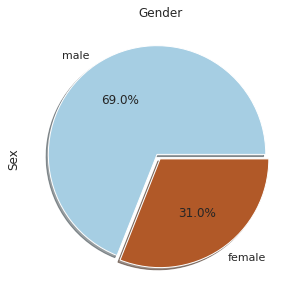

In [838]:
plt.figure(figsize=(15,5))
data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True, cmap='Paired')
plt.title('Gender')
plt.show()

Dataset kita ternyata memiliki user dengan perbandingan gender 69% laki-laki dan 31% perempuan.

### Age

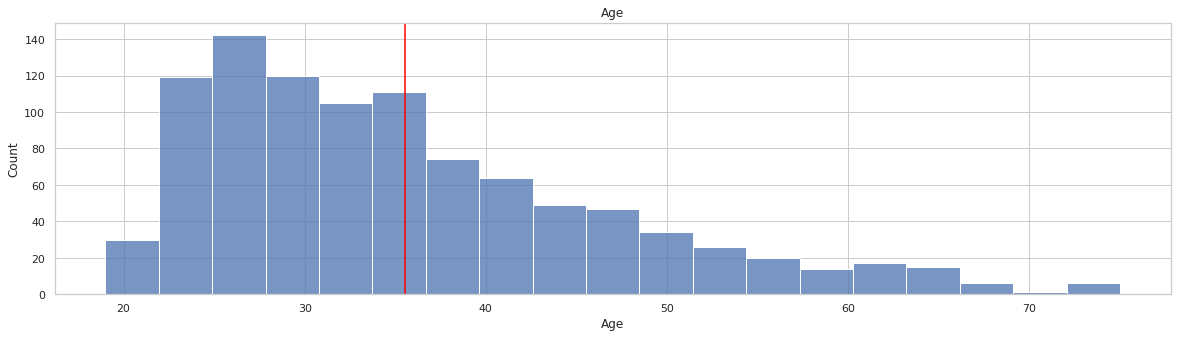

Rata-rata Umur :  35.546


In [839]:
plt.figure(figsize=(20, 5))
sns.histplot(data=data, x='Age')
plt.axvline(x=data.Age.mean(), color='red')
plt.title('Age')
plt.show()
print('Rata-rata Umur : ', data.Age.mean())

Pengguna kartu kredit di Indonesia berdasarkan dataset yang ada memiliki umur termuda yaitu 19 tahun dan umur tertua 75 tahun, dimana rata-rata umur pengguna kartu kredit adalah 35 tahun.

### Job

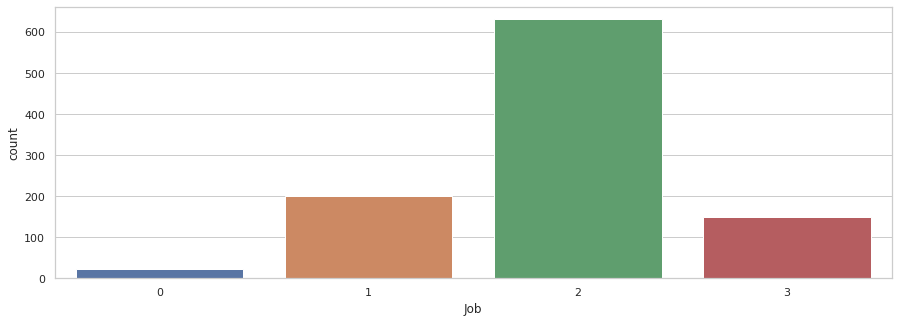

In [840]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Job')
plt.show()

* 0 - unskilled and non-resident
* 1 - unskilled and resident
* 2 - skilled
* 3 - highly skilled

Dari visual di atas kita bisa melihat bahwa Skilled Worker adalah golongan pekerja yang paling banyak menggunakan kartu kredit sedangkan unskilled dan non-resident worker adalah golongan perkerja yang paling jarang menggunakan kartu kredit.


### Housing

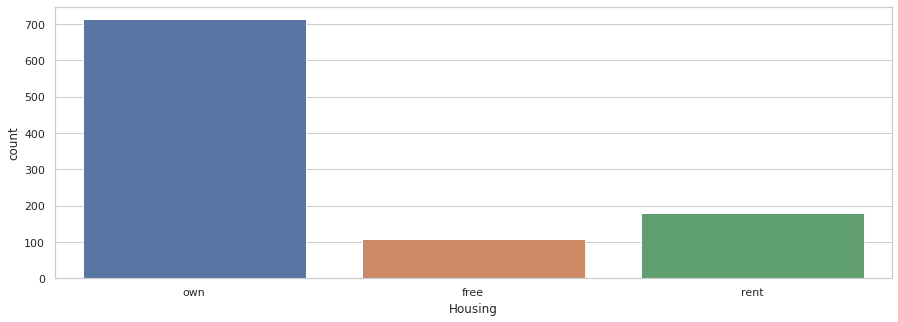

In [841]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Housing')
plt.show()

Berdasarkan visual di atas ternyata orang yang paling banyak menggunakan kartu kredit biasanya memiliki rumah sendiri.

### Saving Accounts

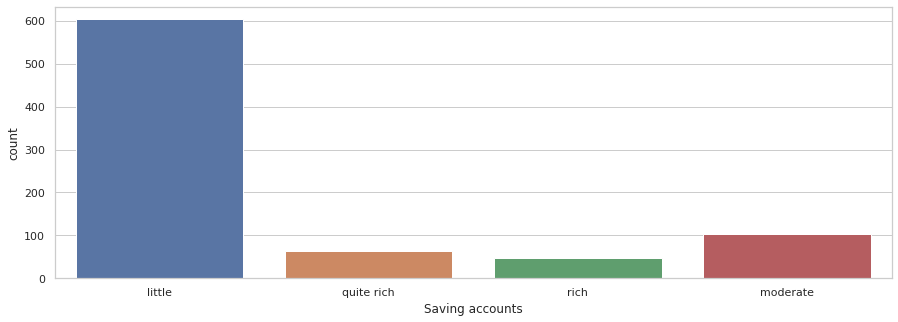

In [842]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Saving accounts')
plt.show()

Ternyata mayoritas pengguna kartu kredit di Indonesia adalah orang yang memiliki jumlah tabungan sedikit, jadi mereka memilih menggunakan kartu kredit untuk membeli keperluan mereka.

### Checking Accounts

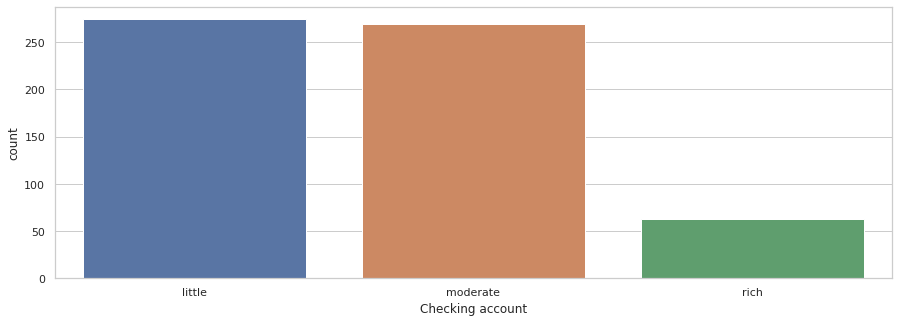

In [843]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Checking account')
plt.show()

Untuk rekening giro, bisa dilihat yang jumlah rekeningnya kecil dan sedang adalah orang-orang yang banyak menggunakan kartu kredit.

### Credit Amount

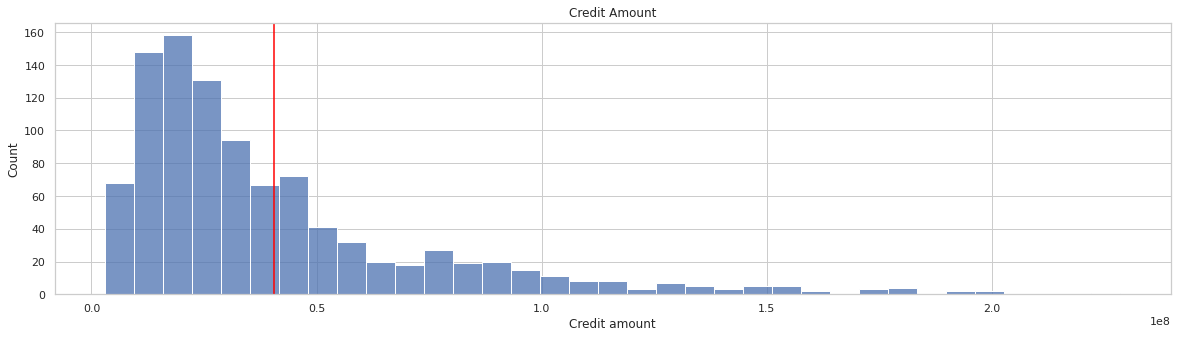

Rata-rata Jumlah Kredit :  40560327.942


In [844]:
plt.figure(figsize=(20, 5))
sns.histplot(data=data, x='Credit amount')
plt.axvline(x=data['Credit amount'].mean(), color='red')
plt.title('Credit Amount')
plt.show()
print('Rata-rata Jumlah Kredit : ', data['Credit amount'].mean())

Jumlah kredit yang digunakan paling kecil adalah 3 juta dan paling besar 200 juta dengan jumlah rata-rata 40 juta.

### Duration

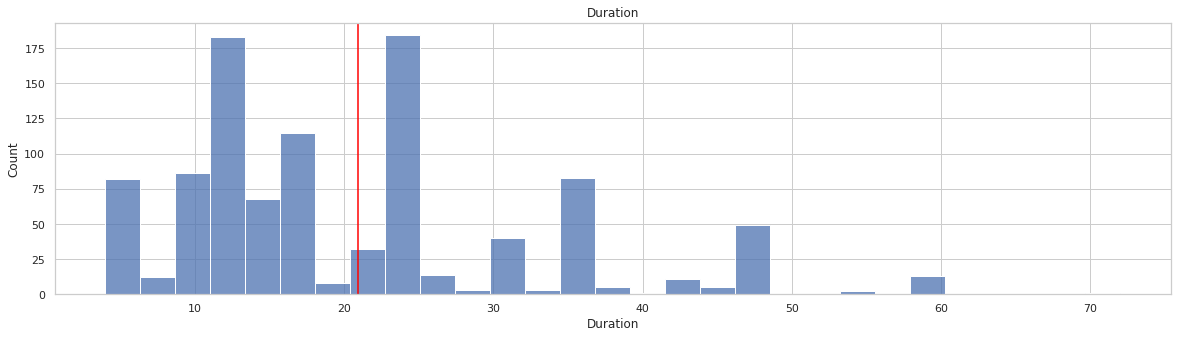

Rata-rata Durasi:  20.903


In [845]:
plt.figure(figsize=(20, 5))
sns.histplot(data=data, x='Duration')
plt.axvline(x=data['Duration'].mean(), color='red')
plt.title('Duration')
plt.show()
print('Rata-rata Durasi: ', data['Duration'].mean())

Bisa dilihat durasi penggunakan kartu kredit sangat beragam dari 4 bulan hingga 72 bulan dengan rata-rata orang menggunakan kartu kredit selama 20 bulan.

### Purpose

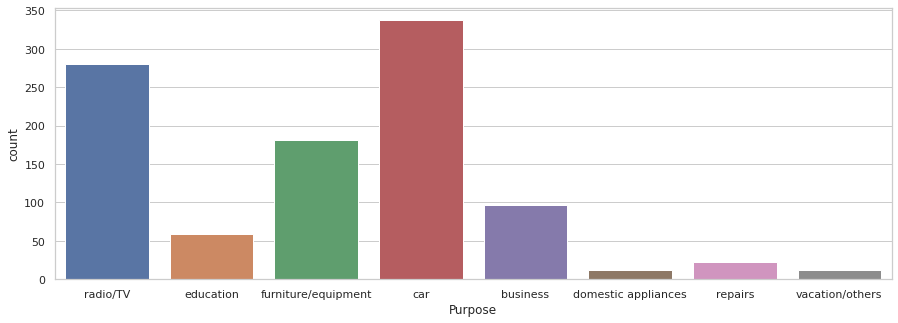

In [846]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Purpose')
plt.show()

Kebanyakan orang Indonesia ternyata menggunakan kartu kredit untuk melakukan cicilan mobil dan disusul oleh cicilan media seperti tv dan ketiga biasanya digunakan untuk cicilan furniture.

## Data Preprocessing

### Make Data Inference

In [847]:
## Get data for model inference
test = data.sample(50, random_state=69)
test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
823,47,male,1,own,little,little,9063669,8,car
999,27,male,2,own,moderate,moderate,56737824,45,car
891,46,male,2,own,little,NaN,22677771,15,radio/TV
781,60,male,2,own,rich,NaN,24054060,24,car
967,54,female,3,rent,little,NaN,44239632,15,radio/TV
764,27,male,2,own,moderate,NaN,30538737,24,car
954,29,female,2,own,little,little,23471307,12,car
693,44,male,1,own,NaN,little,58473684,6,car
26,39,male,1,own,little,NaN,5281974,6,radio/TV
99,36,male,3,rent,NaN,moderate,87499743,20,car


In [848]:
# remove inference set from data set
train = data.drop(test.index)
train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,49,male,1,own,little,NaN,25988304,12,education
5,35,male,1,free,NaN,NaN,112272945,36,education
6,53,male,2,own,quite rich,NaN,35151165,24,furniture/equipment
...,...,...,...,...,...,...,...,...,...
994,50,male,2,own,NaN,NaN,29633610,12,car
995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,40,male,3,own,little,little,47822943,30,car
997,38,male,2,own,little,NaN,9968796,12,radio/TV


In [849]:
#reset index to reduce error
train.reset_index(drop= True, inplace=True)
test.reset_index(drop=True, inplace=True)
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,49,male,1,own,little,NaN,25988304,12,education
3,35,male,1,free,NaN,NaN,112272945,36,education
4,53,male,2,own,quite rich,NaN,35151165,24,furniture/equipment


In [850]:
test.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,47,male,1,own,little,little,9063669,8,car
1,27,male,2,own,moderate,moderate,56737824,45,car
2,46,male,2,own,little,NaN,22677771,15,radio/TV
3,60,male,2,own,rich,NaN,24054060,24,car
4,54,female,3,rent,little,NaN,44239632,15,radio/TV


Sebelum memulai data preprocessing kita akan memisahkan data yang digunakan untuk train dan juga inference. Data yang digunakan untuk train sejumlah 950 data dan 50 data sisanya untuk inference.

### Handling Missing Values

In [851]:
# Mengecek jumlah missing value tiap kolom pada Train-Set

train.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     173
Checking account    376
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Setelah dilakukan checking ternyata terdapat beberapa missing values pada kolom `Saving accounts` dan `Checking accounts` dimana kolom tersebut menunjukan jumlah rekening tabungan dan rekening giro, karena itu menurut saya missing values tersebut hanya menunjukan orang yang tidak memiliki rekening sehingga akan saya ganti missing values menjadi **No Account**.

In [852]:
train.fillna(value='No Account', inplace=True)
train.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

Sekarang sudah tidak ada lagi missing values pada `Saving accounts` dan `Checking accounts`

### Handling Outliers

In [853]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable, 'skewness value : ', df[variable].skew())

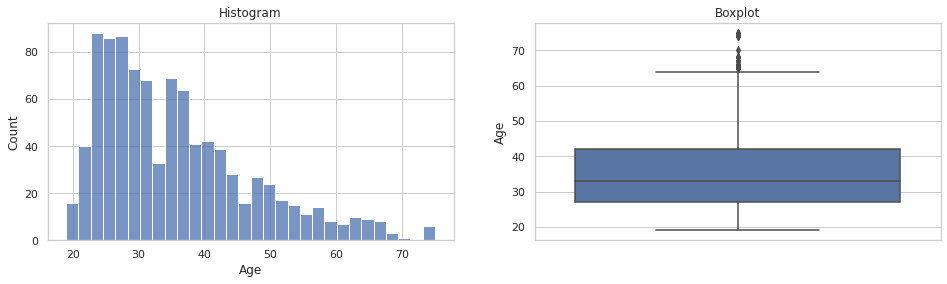

Age skewness value :  1.0271441307441687


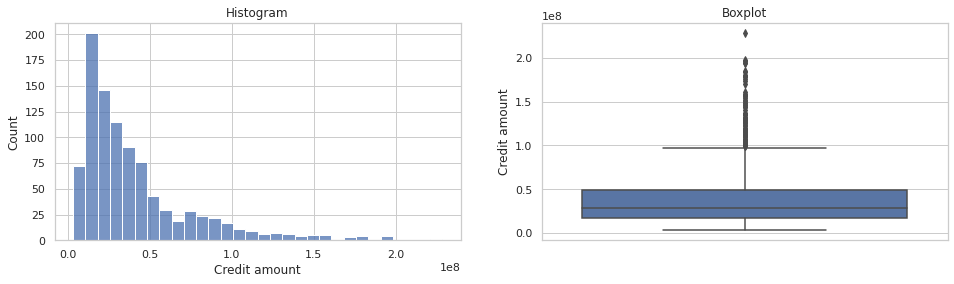

Credit amount skewness value :  1.9500064160683261


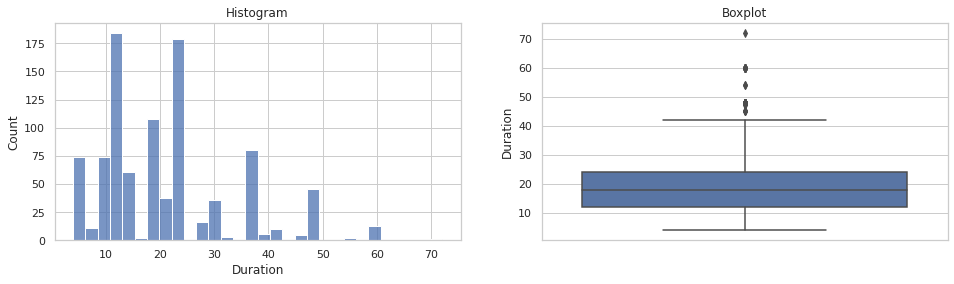

Duration skewness value :  1.0992461312744546


In [854]:
diagnostic_plots(train, 'Age')
diagnostic_plots(train, 'Credit amount')
diagnostic_plots(train, 'Duration')

Setelah dicek ternyata terdapat beberapa outliers pada kolom `Age`, `Credit Amount`, dan `Duration`. Outliers yang ada akan di handling menggunakan Winsorizer

In [855]:
# membuat windsorizer
winsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', #right tails 
                          fold=1.5,
                          variables=['Age', 'Duration', 'Credit amount'])

winsoriser.fit(train)

train = winsoriser.transform(train)

### Feature Selection

In [856]:
#Memilih feature numerical dan categorical
num_columns =['Age', 'Credit amount','Duration']
cat_columns = ['Sex','Job', 'Housing','Saving accounts', 'Checking account', 'Purpose']

In [857]:
df_num = train[num_columns]
df_cat = train[cat_columns]

In [858]:
df_num

,Age,Credit amount,Duration
0,64.5,1.449443e+07,6.0
1,22.0,7.378645e+07,42.0
2,49.0,2.598830e+07,12.0
3,35.0,9.761888e+07,36.0
4,53.0,3.515116e+07,24.0
...,...,...,...
945,50.0,2.963361e+07,12.0
946,31.0,2.152466e+07,12.0
947,40.0,4.782294e+07,30.0
948,38.0,9.968796e+06,12.0


### Feature Scalling

In [859]:
# Feature scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_num) #.fit hanya di Train-Set

train_scaled = scaler.transform(df_num)

In [860]:
# Convert kembali ke bentuk dataframe
train = pd.DataFrame(train_scaled, columns=num_columns)
train

,Age,Credit amount,Duration
0,1.000000,0.120554,0.052632
1,0.065934,0.747856,1.000000
2,0.659341,0.242158,0.210526
3,0.351648,1.000000,0.842105
4,0.747253,0.339100,0.526316
...,...,...,...
945,0.681319,0.280725,0.210526
946,0.263736,0.194933,0.210526
947,0.461538,0.473166,0.684211
948,0.417582,0.072674,0.210526


### Variance Inflation Factor (VIF)

In [861]:
vif_data = pd.DataFrame()
vif_data["feature"] = train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]

vif_data

,feature,VIF
0,Age,1.938283
1,Credit amount,4.461371
2,Duration,4.707285


Ternyata fitur yang ada tidak saling berkaitan maka akan kita biarkan tetap 3 dimensi. Kita akan memastikan lagi menggunakan EVR.

### Eplained Variance Ratio

In [862]:
pca=PCA(whiten=True)
pca.fit(train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

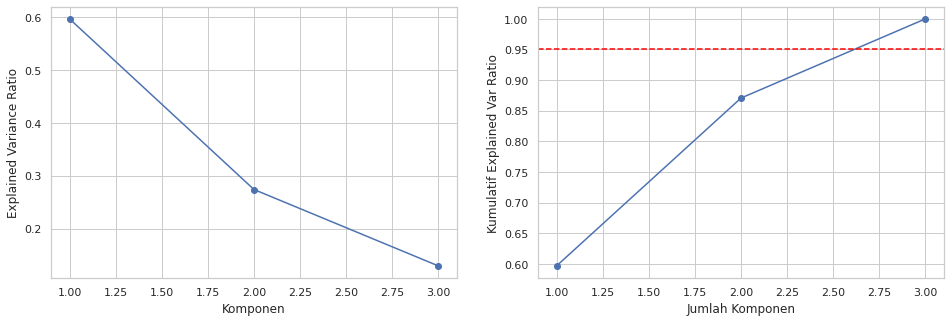

In [863]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,4),pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,4),np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='red', linestyle='--')
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

Berdasarkan EVR kita bisa mempertahankan 95% informasi dari data dengan menggunakan 3 komponen. Maka data train tidak akan direduksi dan tetap berbentuk 3 dimensi.

### PCA

In [875]:
pca_3d = PCA(n_components=3)
pca_3d.fit(train)

train_pca = pca_3d.transform(train)

# Convert to dataframe
train_3d = pd.DataFrame(train_pca, columns=['PCA_' + str(i) for i in range(1, 4)])

In [876]:
train_3d.head()

,PCA_1,PCA_2,PCA_3
0,-0.447890,0.641261,0.040893
1,0.668572,-0.302365,-0.122129
2,-0.247769,0.301093,0.043061
3,0.739314,0.010188,0.137575
4,0.039567,0.375859,-0.126343


## Model Definition

Untuk kasus clustering ini saya memilih untuk menggunakan 3 algortima yaitu KMeans, Agglomerative Clustering dan Spectral Clustering, namun sebelumnya kita harus menemukan jumlah cluster yang tepat menggunakan perhitungan inertia dan silhouette score.

Text(0, 0.5, 'Inertia')

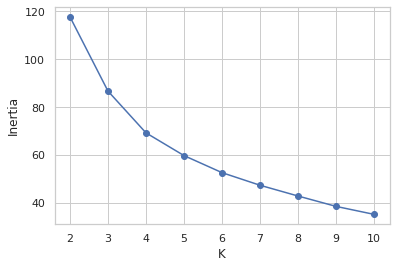

In [866]:
K=[2,3,4,5,6,7,8,9,10]
inertia=[KMeans(n_clusters=i).fit(train_pca).inertia_ for i in K]
plt.plot(K,inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Score')

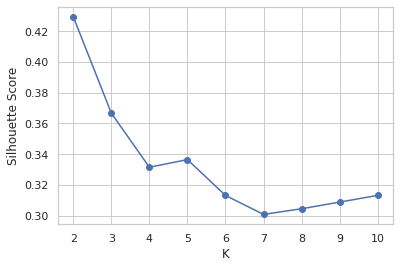

In [867]:
K=[2,3,4,5,6,7,8,9,10]
s_score=[silhouette_score(train, KMeans(n_clusters=i).fit(train_pca).labels_) for i in K]
plt.plot(K, s_score,  marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

In [868]:
s_score

[0.429429731259414,
 0.3666875630144134,
 0.3314773867004207,
 0.33646364280593005,
 0.31314404971632853,
 0.3007859291579169,
 0.30447555623590195,
 0.3087882304490052,
 0.3131899880112479]

Dari hasil Silhouette score ternyata jumlah cluster 2 memiliki score paling tinggi yaitu 0.49, maka dari itu kita akan membuat model dengan jumlah cluster 2.



## Model Training

### KMeans

In [869]:
kmeans = KMeans(n_clusters=3, random_state=17)
kmeans.fit(train_pca)

KMeans(n_clusters=3, random_state=17)

### Agglomerative Clustering

In [870]:
agg = AC(n_clusters=3)
agg.fit(train_pca)

AgglomerativeClustering(n_clusters=3)

### Spectral Clustering

In [871]:
spec = SC(n_clusters=3, random_state=17)
spec.fit(train_pca)

SpectralClustering(n_clusters=3, random_state=17)

## Model Evaluation

### 2Dimensional PCA

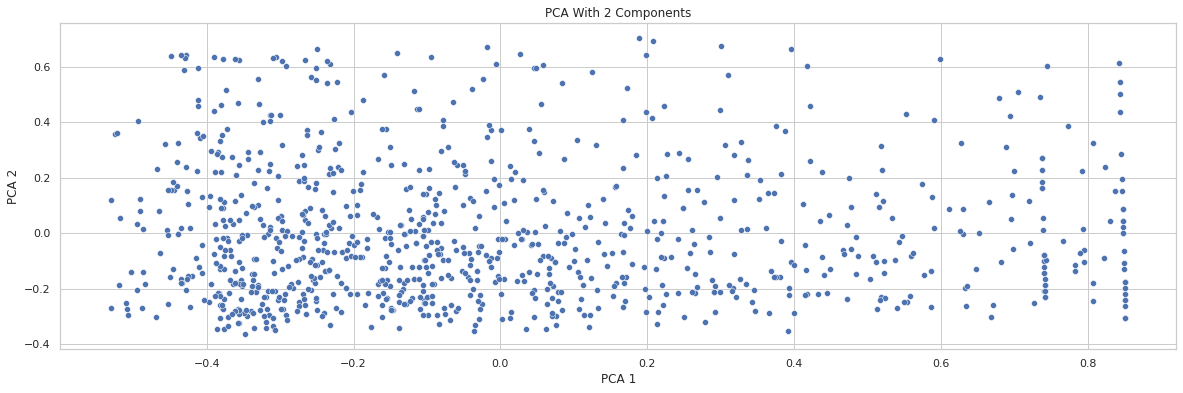

In [872]:
X2D=PCA(n_components=2).fit_transform(train_pca)

plt.figure(figsize=(20, 6))
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])
plt.title('PCA With 2 Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### 2Dimensional KMeans

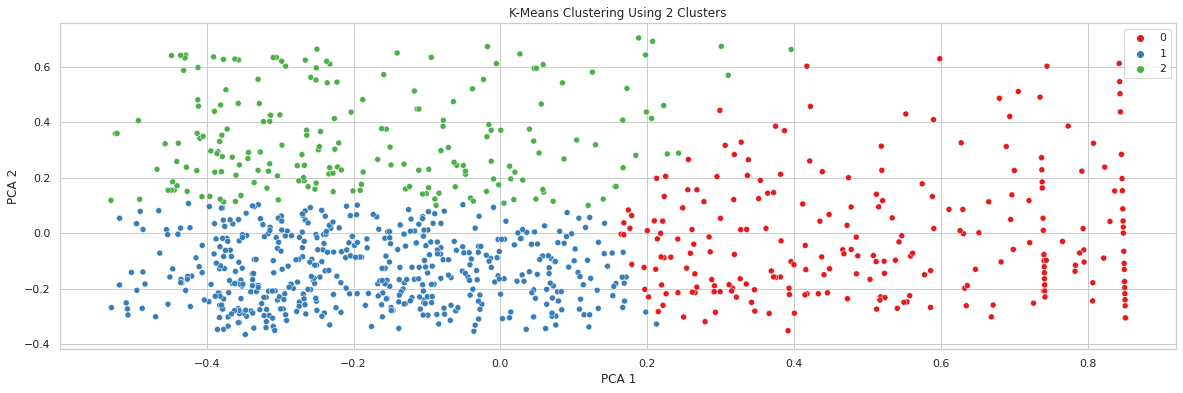

In [877]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=kmeans.labels_, data=train_3d, palette='Set1')
plt.title('K-Means Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### 2Dimensional Agglomerative

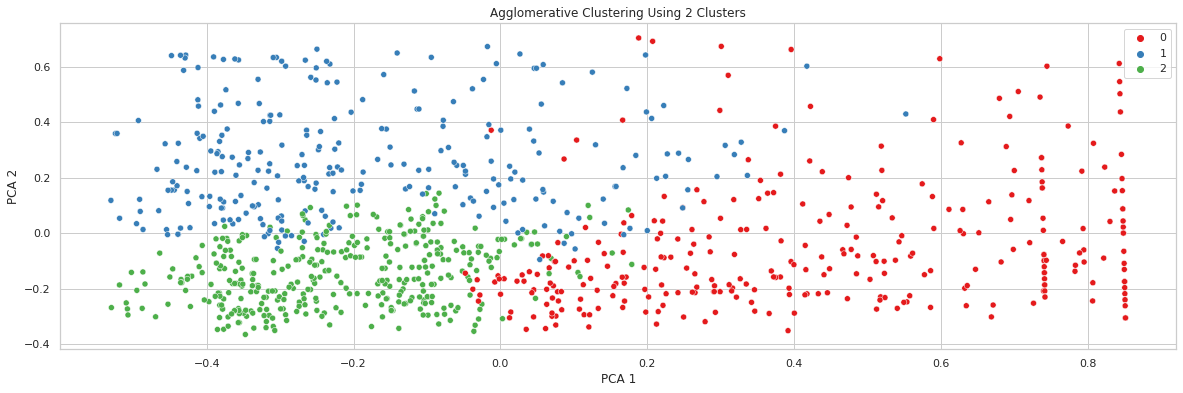

In [878]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=agg.labels_, data=train_3d, palette='Set1')
plt.title('Agglomerative Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### 2Dimensional Spectral

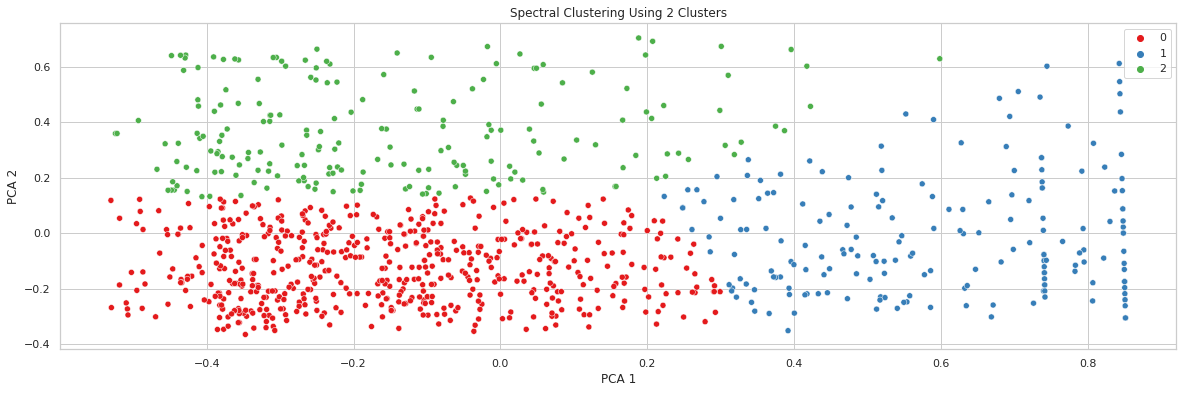

In [879]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=spec.labels_, data=train_3d, palette='Set1')
plt.title('Spectral Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Dari ketiga visual hasil clustering di atas kita bisa melihat bahwa hasil clustering menggunakan KMeans paling baik karena datanya terpisah dengan rapih, tidak ada yang bertumpuk/bercampur, dan jelas pembagian clusternya. Kita akan memilih KMeans untuk melakukan testing pada inference set.

## Model Inference

### Inferencing

In [880]:
test.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,47,male,1,own,little,little,9063669,8,car
1,27,male,2,own,moderate,moderate,56737824,45,car
2,46,male,2,own,little,NaN,22677771,15,radio/TV
3,60,male,2,own,rich,NaN,24054060,24,car
4,54,female,3,rent,little,NaN,44239632,15,radio/TV


In [881]:
test.isnull().sum()

Age                  0
Sex                  0
Job                  0
Housing              0
Saving accounts     10
Checking account    18
Credit amount        0
Duration             0
Purpose              0
dtype: int64

In [882]:
test.fillna(value='No Account', inplace=True)
test.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [883]:
df_test_num = test[num_columns]
df_test_cat = test[cat_columns]

In [884]:
# scaling test set
test_scaled = scaler.transform(df_test_num)
test = pd.DataFrame(test_scaled, columns=num_columns)

In [885]:
# reduksi dimensi test-set
test = pca_3d.transform(test)
test_3d = pd.DataFrame(test, columns=['PCA_' + str(i) for i in range(1, 4)])
test_3d

,PCA_1,PCA_2,PCA_3
0,-0.449563,0.250955,0.000161
1,0.591589,-0.210989,-0.313353
2,-0.217990,0.227983,-0.031604
3,-0.046781,0.520492,-0.221622
4,-0.054599,0.419527,0.108282
5,0.009545,-0.196480,-0.105396
6,-0.262972,-0.138377,0.066665
7,-0.107152,0.226492,0.403327
8,-0.513218,0.076334,0.027376
9,0.370971,0.050663,0.365425


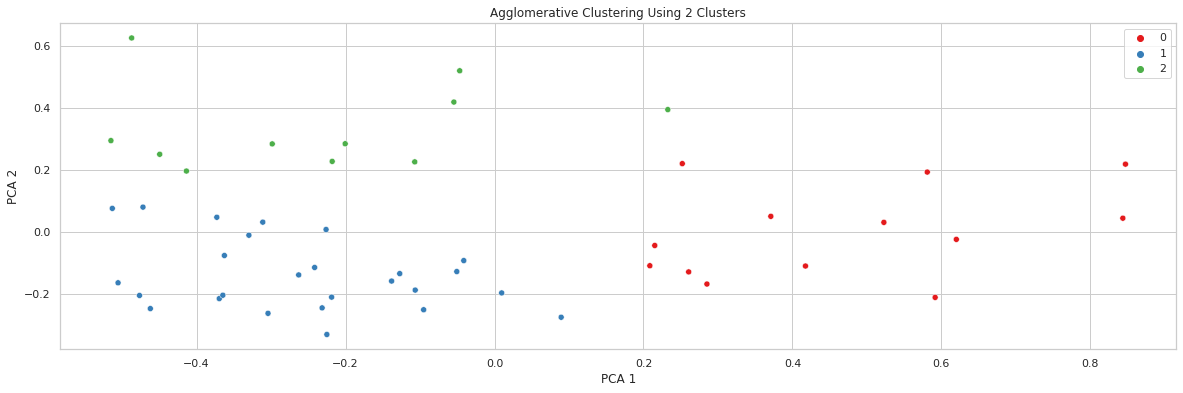

In [886]:
pred = kmeans.predict(test_3d)

plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=pred, data=test_3d, palette='Set1')
plt.title('Agglomerative Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Hasil visual di atas menunjukan hasil clustering pada Test-Set dan ternyata model kita bisa melakukan clustering dengan baik karena tidak ada data yang bertumpuk dan bercampur.

## Clustering Analysis

In [887]:
data_pca = pd.concat([train_3d, test_3d])
data_pred = kmeans.predict(data_pca)

In [888]:
cluster_data = data.copy()
cluster_data['CLUSTER'] = data_pred
cluster_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,CLUSTER
0,67,male,2,own,NaN,little,14494431,6,radio/TV,2
1,22,female,2,own,little,moderate,73786449,48,radio/TV,0
2,49,male,1,own,little,NaN,25988304,12,education,2
3,45,male,2,free,little,little,97728918,42,furniture/equipment,0
4,53,male,2,free,little,little,60383130,24,car,2


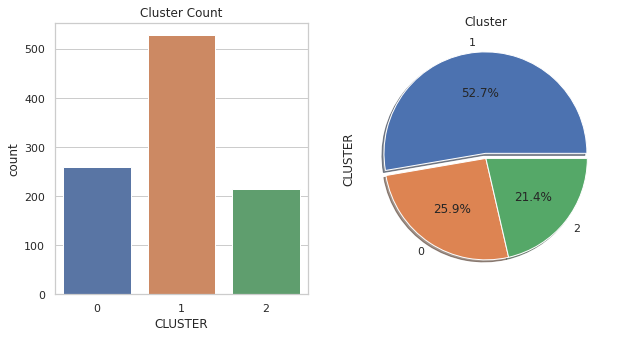

In [889]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='CLUSTER', data=cluster_data)
plt.title('Cluster Count')

plt.subplot(1, 2, 2)
cluster_data['CLUSTER'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True)
plt.title('Cluster')
plt.show()

Kita bisa melihat jumlah data tiap cluster dari visual di atas, cluster 0 memiliki jumlah lebih banyak yaitu sebanyak 57.9% dari keseluruhan data dan cluster 1 sebanyak 18.9% dan cluster 2 sebanyak 23.2% dari keseluruhan data.

In [890]:
c0_df = cluster_data[cluster_data['CLUSTER'] == 0]
c1_df = cluster_data[cluster_data['CLUSTER'] == 1]
c2_df = cluster_data[cluster_data['CLUSTER'] == 2]

In [891]:
c0_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,259.0,3.492664e+01,1.071469e+01,20.0,27.0,33.0,40.5,66.0
Job,259.0,1.942085e+00,6.473897e-01,0.0,2.0,2.0,2.0,3.0
Credit amount,259.0,4.024021e+07,3.449049e+07,4190862.0,16682854.5,27538179.0,49571202.0,194081547.0
Duration,259.0,2.112741e+01,1.218793e+01,4.0,12.0,18.0,24.0,60.0
CLUSTER,259.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [892]:
c1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,527.0,3.546490e+01,1.158446e+01,19.0,26.0,32.0,42.0,75.0
Job,527.0,1.889943e+00,6.402481e-01,0.0,2.0,2.0,2.0,3.0
Credit amount,527.0,4.016173e+07,3.384176e+07,3422124.0,17079622.5,29559216.0,48901656.0,197702055.0
Duration,527.0,2.098672e+01,1.212254e+01,4.0,12.0,18.0,24.0,72.0
CLUSTER,527.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0


In [893]:
c2_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,214.0,3.649533e+01,1.162147e+01,19.0,28.00,34.0,42.00,74.0
Job,214.0,1.892523e+00,6.937956e-01,0.0,2.00,2.0,2.00,3.0
Credit amount,214.0,4.192936e+07,3.838754e+07,3099750.0,16865739.75,28306917.0,50795603.25,228439176.0
Duration,214.0,2.042523e+01,1.178451e+01,6.0,12.00,18.0,24.00,60.0
CLUSTER,214.0,2.000000e+00,0.000000e+00,2.0,2.00,2.0,2.00,2.0


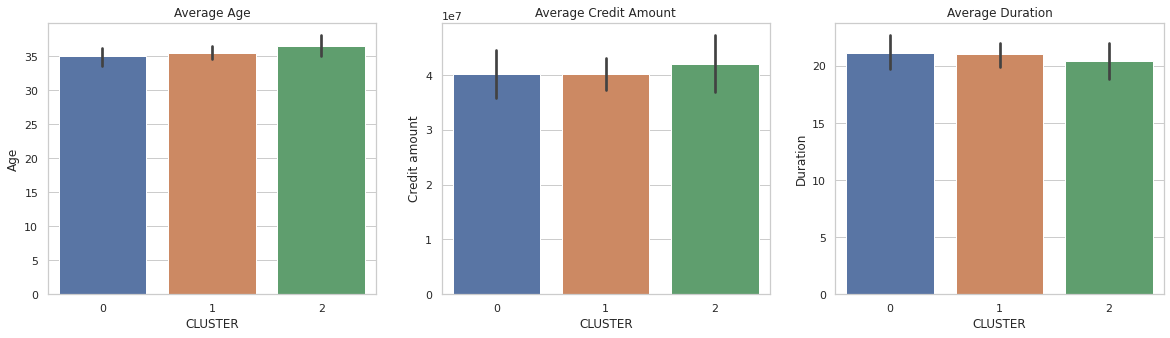

In [894]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=cluster_data, x="CLUSTER", y="Age")
plt.title('Average Age')

plt.subplot(1, 3, 2)
sns.barplot(data=cluster_data, x="CLUSTER", y="Credit amount")
plt.title('Average Credit Amount')

plt.subplot(1, 3, 3)
sns.barplot(data=cluster_data, x="CLUSTER", y="Duration")
plt.title('Average Duration')
plt.show()

In [895]:
grouped = cluster_data.groupby(['CLUSTER'], as_index=False).mean().round(1)
grouped

,CLUSTER,Age,Job,Credit amount,Duration
0,0,34.9,1.9,40240212.5,21.1
1,1,35.5,1.9,40161725.6,21.0
2,2,36.5,1.9,41929362.3,20.4


# Conclusion

Dataset kali ini berisikan data-data pengguna kartu kredit. Data-datanya berisi seperti umur, durasi, gender, jumlah tagihan, dan lain-lain. 

Dari data di atas kita akan melakukan clustering menggunakan 3 model yaitu Kmeans, agglomerative clustering dan spectral clustering dimana sebelumnya akan dilakukan dulu pengurangan dimensi(PCA) untuk mempermudah clustering. Dari 3 kolom numeric kita bisa mereduksi menjadi hanya 3 kolom saja menggunakan PCA dan tetap mempertahankan 95% kualitas data.

Kita melakukan clustering menggunakan 3 model clustering dengan jumlah cluster 3 dimana jumlah tersebut diperoleh dari hasil inertia dan silhouette score. Secara sekilas kita bisa melihat bahwa hasil clustering antar model kita cukup baik namun model KMeans memperoleh hasil paling baik diantara 3 model karena secara visual pada model KMeans tidak ada data yang bercampur/bertumpuk dimana hal tersebut terjadi pada 2 model lain.

